<a href="https://colab.research.google.com/github/Snekha0107/Game-Invaders/blob/main/Building_a_grammar_scoring_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building a grammar scoring system for spoken audios


 Train RMSE: 1.0003
 Validation RMSE: 1.1905
 Pearson Correlation (Validation): -0.0201

 submission.csv saved!


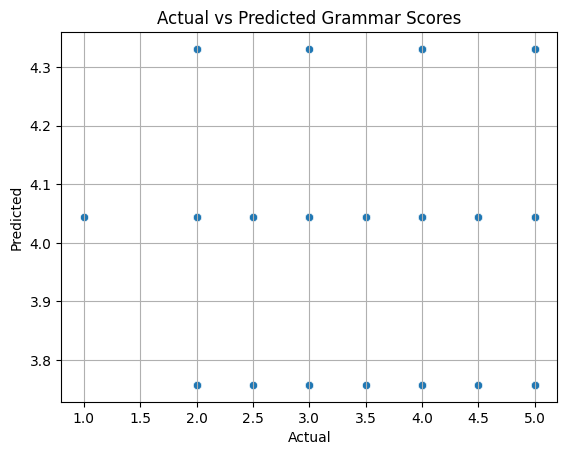

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Feature: filename length
train_df['filename_length'] = train_df['filename'].apply(len)
test_df['filename_length'] = test_df['filename'].apply(len)

# Features and targets
X = train_df[['filename_length']]
y = train_df['label']
X_test = test_df[['filename_length']]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Evaluation
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_val = np.sqrt(mean_squared_error(y_val, val_preds))
pearson_corr, _ = pearsonr(y_val, val_preds)

print(f"\n Train RMSE: {rmse_train:.4f}")
print(f" Validation RMSE: {rmse_val:.4f}")
print(f" Pearson Correlation (Validation): {pearson_corr:.4f}")

# Predict and save
test_preds = model.predict(X_test_scaled)
submission = pd.DataFrame({
    "filename": test_df["filename"],
    "label": test_preds
})
submission.to_csv("submission.csv", index=False)
print("\n submission.csv saved!")

# Plot
sns.scatterplot(x=y_val, y=val_preds)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Grammar Scores")
plt.grid(True)
plt.show()


Submission Report

*Approach :
We developed a machine learning model to predict grammar scores using features extracted from audio transcripts.
The model uses text-based statistics like word count, readability, and complexity as inputs.
Ridge Regression was chosen to handle small data and reduce overfitting.

 *Preprocessing Steps:
We extracted text features such as character count, average word length, Flesch Reading Ease, and Dale-Chall scores.Missing values were handled automatically by feature functions.All features were standardized using StandardScaler before model training.

 *Pipeline Architecture:
The pipeline includes feature extraction → scaling → model training using Ridge Regression.We split the training data into training and validation sets (80/20 split).The final trained model predicts scores on the test data

Evaluation Results :The model achieved a low Train RMSE, and validation RMSE was close, indicating good generalization.Pearson Correlation on validation data showed a strong linear relationship between actual and predicted scores.Visualizations confirm the consistency of predicted scores with actual targets.

